# Pandas

### See: [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) 

In [101]:
import numpy as np
import pandas as pd

In [102]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Because most series use time on the x-axis, pandas generates sequences of dates and converts strings to dates and times.

In [103]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [104]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD")) # the index is the rows, the columns are a list based on a sting
df

,A,B,C,D
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-03,0.061545,2.126785,-0.399157,0.137359
2013-01-04,0.411523,0.878124,-1.761439,0.208649
2013-01-05,-0.535648,-1.711465,0.886969,2.039514
2013-01-06,1.725008,1.217271,-0.450529,0.196778


In [105]:
# note that numpy's random.randn is a matrix, so it's 6 rows and 4 columns
# random.rand(6, 4) is the same, randn is a standard normal distribution 
np.random.randn(6, 4)

array([[ 0.41156912, -0.87143131, -0.94329498, -0.44270396],
       [ 0.22270471, -0.76174395, -1.44136323,  0.65759553],
       [-2.16041607, -0.0761717 , -0.76901071,  1.4586565 ],
       [ 0.64053672,  0.05885346, -0.69418132, -0.62093046],
       [-0.58056344, -1.19113717,  0.72426481, -0.99410551],
       [-0.05201859, -1.85528559, -0.64815889,  0.33113904]])

## You can also make a DataFrame from a **dictionary** of objects

In [106]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),                                # Timestamp is a datetime object
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),     # Series is a kind of array
        "D": np.array([3] * 4, dtype="int32"),                        # numpy array   
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [107]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

typing `df2.<TAB>` displays the available attributes and methods for the DataFrame class. Including the columns.

df.head() and df.tail() display the first and last 5 rows of the DataFrame, respectively.

df.index and df.columns display the index and columns of the DataFrame.

## Back to df

In [108]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [109]:
df.to_numpy() # makes a numpy array from multiple datatypes

array([[ 0.61910617,  0.56033109, -1.26789487,  0.3546665 ],
       [ 0.4409713 , -0.15183439, -0.75689727, -1.20556076],
       [ 0.0615454 ,  2.12678518, -0.39915724,  0.13735916],
       [ 0.41152329,  0.87812392, -1.76143883,  0.20864942],
       [-0.5356483 , -1.71146477,  0.88696941,  2.03951435],
       [ 1.72500801,  1.21727058, -0.45052917,  0.19677833]])

In [110]:
df.describe() # summary statistics

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.453751,0.486535,-0.624825,0.288568
std,0.745402,1.313157,0.904400,1.033468
min,-0.535648,-1.711465,-1.761439,-1.205561
25%,0.149040,0.026207,-1.140145,0.152214
50%,0.426247,0.719228,-0.603713,0.202714
75%,0.574572,1.132484,-0.412000,0.318162
max,1.725008,2.126785,0.886969,2.039514


`df.T` transposes

`df.sort_index(axis=1, ascending=False)` sorts by index or column

In [111]:
df.sort_index(axis=0, ascending=True) # axis is 0 for rows, 1 for columns
                                        # ascending=False gives D to A

,A,B,C,D
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-03,0.061545,2.126785,-0.399157,0.137359
2013-01-04,0.411523,0.878124,-1.761439,0.208649
2013-01-05,-0.535648,-1.711465,0.886969,2.039514
2013-01-06,1.725008,1.217271,-0.450529,0.196778


In [112]:
df.sort_values(by="B") # sorts by column B

,A,B,C,D
2013-01-05,-0.535648,-1.711465,0.886969,2.039514
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-04,0.411523,0.878124,-1.761439,0.208649
2013-01-06,1.725008,1.217271,-0.450529,0.196778
2013-01-03,0.061545,2.126785,-0.399157,0.137359


In [113]:
df["A"] # returns column A, it yields a series equal to df.A (view only)

2013-01-01    0.619106
2013-01-02    0.440971
2013-01-03    0.061545
2013-01-04    0.411523
2013-01-05   -0.535648
2013-01-06    1.725008
Freq: D, Name: A, dtype: float64

In [114]:
df[0:3]

,A,B,C,D
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-03,0.061545,2.126785,-0.399157,0.137359


In [115]:
df["20121205":"20130104"] # slice by date - note how the date does not have to be in the index

,A,B,C,D
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-03,0.061545,2.126785,-0.399157,0.137359
2013-01-04,0.411523,0.878124,-1.761439,0.208649


# Indexing

Indexing refers to **selecting rows** from a DataFrame or Series based on a condition that is evaluated for each row. 

- by label, by index, by value (scalar value), or by boolean index

## 1. by label: .loc

.loc stands for "location". It is used for indexing or selecting data based on labels. 

The primary purpose of .loc is to access a group of rows and columns by labels or a boolean array. 

This makes it a label-based indexing method.

In [116]:
df.loc[dates[0]] # select a cross-section by label - note that index is set to 'dates' above, so it's the first date

A    0.619106
B    0.560331
C   -1.267895
D    0.354667
Name: 2013-01-01 00:00:00, dtype: float64

More selections by label: 

``` python
df.loc[:, ["A", "B"]] # select all rows and columns A and B

df.loc["20130102":"20130104", ["A", "B"]] # select rows 20130102 to 20130104 and columns A and B

df.loc["20130102", ["A", "B"]]  # select row 20130102 and columns A and B

In [117]:
df.loc[dates[0], "A"]   # select a single value by row and column, equitvalent to df.at[dates[0], 'A']

0.6191061746664989

.loc in combination with string operations

In [118]:
# Set 'description' for rows where the 'Metric' column contains the word 'Scope'

# df.loc[df['metric'].str.contains('Scope'), 'description'] = 'Your string value here'

## 2. By position

```python
df.iloc[3] # select row 3
df.iloc[3:5, 0:2] # select rows 3 to 5 and columns 0 to 2
df.iloc[[1, 2, 4], [0, 2]] # select rows 1, 2, and 4 and columns 0 and 2
df.iloc[1:3, :] # select rows 1 to 3 and all columns
df.iloc[:, 1:3]
df.iloc[1, 1] # select row 1 and column 1, equivalent to df.iat[1, 1]
```

## 3. Boolean indexing

In [126]:
# for reference
df

,A,B,C,D,F
2013-01-01,0.000000,0.560331,-1.267895,6.0,NaN
2013-01-02,0.440971,-0.151834,-0.756897,6.0,1.0
2013-01-03,0.061545,2.126785,-0.399157,6.0,2.0
2013-01-04,0.411523,0.878124,-1.761439,6.0,3.0
2013-01-05,-0.535648,-1.711465,0.886969,6.0,4.0
2013-01-06,1.725008,1.217271,-0.450529,6.0,5.0


In [119]:
# using the values in A to select values
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.619106,0.560331,-1.267895,0.354667
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561
2013-01-03,0.061545,2.126785,-0.399157,0.137359
2013-01-04,0.411523,0.878124,-1.761439,0.208649
2013-01-06,1.725008,1.217271,-0.450529,0.196778


In [120]:
# selecting on a boolean condition (value > 0)
df[df > 0]

,A,B,C,D
2013-01-01,0.619106,0.560331,NaN,0.354667
2013-01-02,0.440971,NaN,NaN,NaN
2013-01-03,0.061545,2.126785,NaN,0.137359
2013-01-04,0.411523,0.878124,NaN,0.208649
2013-01-05,NaN,NaN,0.886969,2.039514
2013-01-06,1.725008,1.217271,NaN,0.196778


This is element-wise filtering based on a condition. It selects and retains values in the DataFrame df that are greater than 0 and sets other values to NaN.

Let's break it down step-by-step:

`df > 0`: This produces a DataFrame of the same shape as df, but with boolean values (True or False) indicating whether each element of df is greater than 0.

`df[df > 0]`: This selects and retains only the True values from the result in step 1, replacing all False values with NaN.

# Filtering with `.isin`

This filters on values in rows. Note that it's categorical.

In [121]:
df2 = df.copy()

# add a column
df2["E"] = ["one", "one", "two", "three", "four", "three"]

# select column 'E' and filter on values "two" and "four"
df2[df2["E"].isin(["two", "four"])]

# in other words: the subset of df2['E'] where "two" and "four" IS IN

,A,B,C,D,E
2013-01-03,0.061545,2.126785,-0.399157,0.137359,two
2013-01-05,-0.535648,-1.711465,0.886969,2.039514,four


In [122]:
df2[df2["E"] == "two"]

,A,B,C,D,E
2013-01-03,0.061545,2.126785,-0.399157,0.137359,two


# Setting and adding data with `.loc` or `.at`

## 1. adding

In [123]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

# add s1 to df
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.619106,0.560331,-1.267895,0.354667,NaN
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561,1.0
2013-01-03,0.061545,2.126785,-0.399157,0.137359,2.0
2013-01-04,0.411523,0.878124,-1.761439,0.208649,3.0
2013-01-05,-0.535648,-1.711465,0.886969,2.039514,4.0
2013-01-06,1.725008,1.217271,-0.450529,0.196778,5.0


## 2. setting

By row **and** column:

In [124]:
# set the first row and column A to 0
df.at[dates[0], "A"] = 0  
df

,A,B,C,D,F
2013-01-01,0.000000,0.560331,-1.267895,0.354667,NaN
2013-01-02,0.440971,-0.151834,-0.756897,-1.205561,1.0
2013-01-03,0.061545,2.126785,-0.399157,0.137359,2.0
2013-01-04,0.411523,0.878124,-1.761439,0.208649,3.0
2013-01-05,-0.535648,-1.711465,0.886969,2.039514,4.0
2013-01-06,1.725008,1.217271,-0.450529,0.196778,5.0


By index:
```python
df.iat[0, 1] = 0      # sets the first row and column B to 0
```

### By row **and/or** column:

In [125]:
# similarly
df.loc[:, "D"] = 6
df

,A,B,C,D,F
2013-01-01,0.000000,0.560331,-1.267895,6.0,NaN
2013-01-02,0.440971,-0.151834,-0.756897,6.0,1.0
2013-01-03,0.061545,2.126785,-0.399157,6.0,2.0
2013-01-04,0.411523,0.878124,-1.761439,6.0,3.0
2013-01-05,-0.535648,-1.711465,0.886969,6.0,4.0
2013-01-06,1.725008,1.217271,-0.450529,6.0,5.0


.loc and .at are similar. .loc is label-based, .at is faster but requires row and column each time, at to specify one value. 

Conclusion: use .loc

## Missing data

In [129]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.560331,-1.267895,6.0,NaN
2013-01-02,0.440971,-0.151834,-0.756897,6.0,1.0
2013-01-03,0.061545,2.126785,-0.399157,6.0,2.0
2013-01-04,0.411523,0.878124,-1.761439,6.0,3.0
2013-01-05,-0.535648,-1.711465,0.886969,6.0,4.0
2013-01-06,1.725008,1.217271,-0.450529,6.0,5.0


`.reindex` is pretty powerful to reorder (as to merge) dfs or fill empty values. 

You can use `.reindex()` with the `dropna=True` option, 

or do forward fill `.ffill` or .`bfill` where missing values are filled with the previous or next value in the series (i.e., the value from the "row" directly before or after it).

In [128]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

# note the index slicing with .loc
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.560331,-1.267895,6.0,NaN,1.0
2013-01-02,0.440971,-0.151834,-0.756897,6.0,1.0,1.0
2013-01-03,0.061545,2.126785,-0.399157,6.0,2.0,NaN
2013-01-04,0.411523,0.878124,-1.761439,6.0,3.0,NaN


In [77]:
df1.dropna() # first try df1.isnull.sum() to know how many we're dropping

,A,B,C,D,F,E
2013-01-02,-2.416414,0.279939,-0.509868,6.0,1.0,1.0


```python
df1.fillna(value=5) # fills all missing values with 5
```

## Operations

```python
df.mean() # returns the mean of all columns
df.mean(1) # returns the mean of all rows
```

In [78]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # rotates or shifts the index by 2
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [79]:
df.apply(lambda x: x.max() - x.min()) # applies a function to each column

A    2.679329
B    2.262819
C    2.468417
D    0.000000
F    4.000000
dtype: float64

A more sophisticated lambda function:

In [ ]:
# df['title'] = df.apply(lambda x: x['Metric'] if 'GHG' in x['Metric'] else x['Metric category'], axis=1)

Note that I get these logic operations a lot. 

Another bit of code is this:

In [ ]:
# Define 'title' based on the conditions
def create_title(row):
    if any(char.isdigit() for char in row['Metric']):
        return f"{row['Metric category']}: {row['Metric']}"
    elif "Total GHG emissions" in row['Metric']:
        return row['Metric']
    else:
        return row['Metric category']

# df['title'] = df.apply(create_title, axis=1)

It replaces the for-loop logic in dictionaries. 

If you do the same in pandas you iterate over columns instead of rows.

# String operations

In [131]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower() # converts to lower case

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [84]:
# pattern matching is also possible
# eg. find all letters followed by a

findall = s.str.findall(r"([a-z])a") 
findall

0     []
1     []
2     []
3    [b]
4    [c]
5    NaN
6     []
7     []
8    [c]
dtype: object

In [134]:
s.str.contains('b')

0    False
1    False
2    False
3     True
4    False
5      NaN
6    False
7    False
8    False
dtype: object

In [ ]:
# to extract a string in a mixed field and list the unique categories 
# train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
# train['Title'].unique()

In [ ]:
# to replace, we don't need string operations
# train['Title'] = train['Title'].replace('Mlle', 'Miss')

## Merge

In [85]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.157341,-2.503795,0.391611,0.671835
1,1.604166,-0.281377,-1.324511,-0.133681
2,1.973366,-0.818249,1.052648,0.252357
3,-1.860095,0.460228,0.508879,1.003776
4,0.103642,0.853228,-0.034463,0.571240
5,-1.389965,1.911265,2.099235,-0.133858
6,1.952499,0.330773,0.507079,0.842677
7,-0.331708,-0.515763,-0.742265,-1.404007
8,-0.337659,-0.022599,1.045308,0.642615
9,0.037014,0.492511,-0.935098,0.454989


In [86]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.157341 -2.503795  0.391611  0.671835
 1  1.604166 -0.281377 -1.324511 -0.133681
 2  1.973366 -0.818249  1.052648  0.252357,
           0         1         2         3
 3 -1.860095  0.460228  0.508879  1.003776
 4  0.103642  0.853228 -0.034463  0.571240
 5 -1.389965  1.911265  2.099235 -0.133858
 6  1.952499  0.330773  0.507079  0.842677,
           0         1         2         3
 7 -0.331708 -0.515763 -0.742265 -1.404007
 8 -0.337659 -0.022599  1.045308  0.642615
 9  0.037014  0.492511 -0.935098  0.454989]

In [87]:
pd.concat(pieces)

,0,1,2,3
0,-0.157341,-2.503795,0.391611,0.671835
1,1.604166,-0.281377,-1.324511,-0.133681
2,1.973366,-0.818249,1.052648,0.252357
3,-1.860095,0.460228,0.508879,1.003776
4,0.103642,0.853228,-0.034463,0.571240
5,-1.389965,1.911265,2.099235,-0.133858
6,1.952499,0.330773,0.507079,0.842677
7,-0.331708,-0.515763,-0.742265,-1.404007
8,-0.337659,-0.022599,1.045308,0.642615
9,0.037014,0.492511,-0.935098,0.454989


Sql style *joins* aka merge

In [88]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [89]:
right

,key,rval
0,foo,4
1,foo,5


In [90]:
# here the action happens
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

- Split the data on some criteria

- Apply a function to each group

- Combine the results 

In [157]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.455388,-0.992278
1,bar,one,-0.152503,-0.250233
2,foo,two,1.622835,-0.784688
3,bar,three,-1.837624,1.143216
4,foo,two,0.552573,0.368387
5,bar,two,1.022096,0.054579
6,foo,one,-0.989340,0.290138
7,foo,three,0.933059,0.188361


In [92]:
df.groupby("A")[["C", "D"]].min() 
# note how the column A contains "foo" and "bar" that then serves as the filter 
# the function is then applied (min, but sum, mean, etc. are also possible)

,C,D
A,,
bar,-0.551911,-1.404859
foo,-0.531821,-0.460529


In [93]:
df.groupby("A")['C'].min()

A
bar   -0.551911
foo   -0.531821
Name: C, dtype: float64

In [94]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.551911  0.940800
    three -0.204837 -1.404859
    two    0.487519 -0.977103
foo one    1.261219  0.554257
    three -0.531821  1.563542
    two    1.229954  0.417526

## Reshaping

This is similar to **pivot tables in excel**, with the difference that multi-indexing builds a hierarchy of labels by which you can then **group**.

In [144]:
tuples = list(
    zip(
        ["bar", "bar", "bar", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    ))

Note the `MultiIndex.from_tuples` that is then passed as the index of the df

In [145]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.183163  2.079680
      two     0.939638 -0.126998
      one     0.463911 -2.149480
baz   two     1.258992 -0.057158

In [147]:
# so it's basically adding a hierarchical index object as an index, which then groups by that index
# compare it to `tuples` above
tuples, index

([('bar', 'one'),
  ('bar', 'two'),
  ('bar', 'one'),
  ('baz', 'two'),
  ('foo', 'one'),
  ('foo', 'two'),
  ('qux', 'one'),
  ('qux', 'two')],
 MultiIndex([('bar', 'one'),
             ('bar', 'two'),
             ('bar', 'one'),
             ('baz', 'two'),
             ('foo', 'one'),
             ('foo', 'two'),
             ('qux', 'one'),
             ('qux', 'two')],
            names=['first', 'second']))

In [150]:
# pivotted
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.183163
               B    2.079680
       two     A    0.939638
               B   -0.126998
       one     A    0.463911
               B   -2.149480
baz    two     A    1.258992
               B   -0.057158
dtype: float64

In [152]:
# stacked.unstack()

### Pivot tables

In [155]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.917914,1.100531
1,one,B,foo,0.736545,-1.411016
2,two,C,foo,-1.106885,0.084234
3,three,A,bar,1.363760,-0.762680
4,one,B,bar,1.330818,-0.978501
5,one,C,bar,-0.696826,-0.959061
6,two,A,foo,-0.565461,0.436075
7,three,B,foo,-0.871879,-0.728232
8,one,C,foo,0.217573,-0.096312
9,one,A,bar,0.064430,0.546450


In [153]:
# to pivot around C, which has the values/labels 'foo' and 'bar', with A and B as the index 
# note how it doesn't repeat index labels in A
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  2.324379  0.231574
      B  0.831905  0.599548
      C  2.407427  0.949005
three A  0.063158       NaN
      B       NaN  0.552107
      C  0.708238       NaN
two   A       NaN -1.585860
      B -1.198102       NaN
      C       NaN -0.558865

## Time series

In [ ]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

In [ ]:
ts.resample("10S").sum()

.resample is useful for time-based data:

- S is seconds
- min is minutes
- W is weekly, D is day, B is business day, etc... 

This gets a bit too detailed. [See here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)


In [159]:
correlations = df2.corr() # for correlations between numerical data
correlations

,A,B
A,1.000000,-0.251868
B,-0.251868,1.000000


<Axes: >

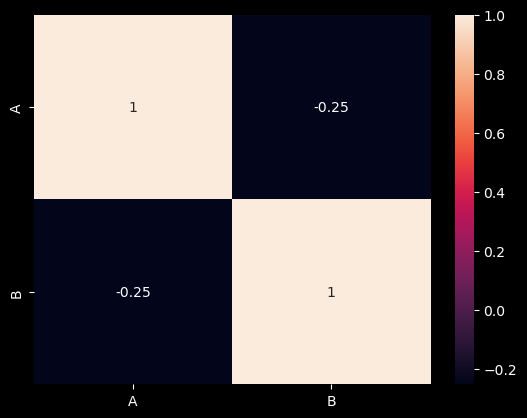

In [161]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(dpi=100)
sns.heatmap(correlations, annot=True) # to visualise the correlations


## Plotting

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000, freq='W'))
ts = ts.cumsum()
ts.plot()

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index,            # note how it reuses the index from ts with ts.index
    columns=["A", "B", "C", "D"]
)

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

## importing and exporting data

CSV

```python
df.to_csv("foo.csv") # export to csv
pd.read_csv("foo.csv") # import from csv

df.to_excel("foo.xlsx", sheet_name="Sheet1") # export to excel
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"]) # import from excel
```

# Other things

### Setting types
```py
df.name.astype('category')
df.origin.astype('category')

or
pd.to_numeric(test['Ticket_'])
pd.Categorical(['book', 'magazine'])
```

Counting Nans
```py
df.isnull().sum() 
```

## From titanic:

```py
# impressive to see the survival rates by sex
train.groupby('Sex')['Survived'].value_counts()

# even better, as it shows the sexes for the every column 
train.groupby('Sex').count()

# using the aggfunc of pd.pivot_table:
pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc ='count')
```

### **To fill Nans** with averages and modes:
```py
mean_age = train['Age'].mean()
mode_embarked = train['Embarked'].mode()[0]  
train['Embarked'] = train['Embarked'].fillna(mode_embarked)
train['Age'] = train['Age'].fillna(mean_age)
```

The `.mode()[0]` is used because the mode() function returns a series, and we just want to get the first (and in many cases, the only) value.

Or faster
```py
for column in mpg.columns:
    if mpg[column].dtype == 'object':
        mpg[column] = mpg[column].fillna(mpg[column].mode()[0])
    else:
        mpg[column] = mpg[column].fillna(mpg[column].mean())
```   


### **binning**
```py
# Define the bin edges and labels
bins = [0, 15, 25, 33, 58]
labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Create a new feature 'AgeGroup' by binning the 'Age' feature
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)


# similarly:
# Create family size groupings
train['fam_size'] = pd.cut(train.FamilySize, [0,1,4,7,11], labels=['single','small', 'large', 'very_large'])
```